# **Assignment 1** 
# Srujana Vanka  - 2020102005


# Question 2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing librabies
import numpy as np
import pandas as pd 
import cv2
import matplotlib.pyplot as plt
import os
from google.colab import drive
%matplotlib inline
from google.colab.patches import cv2_imshow 
import math

### Part 1

Chroma keying is basically the process of compositing two images or videos together. In chroma keying we layer the two images based on image hues. 

The bright green colour makes the exchange of pixels easy as it is much different from skin colour so it is easy to differentiate. 


In [ ]:
# Finds the most frequently occurring color from the image
def mostFrequently(im):
  freqC = dict()
  # Iterate over every pixel in the range
  for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            colour = tuple(im[i, j])
            # Freq array to keep count
            if colour in freqC:
                freqC[colour] += 1
            else:
                freqC[colour] = 1
              
  # Extract the colour that occurs most frequently 
  return (max(freqC, key=freqC.get), freqC[max(freqC, key=freqC.get)])

### Part 2

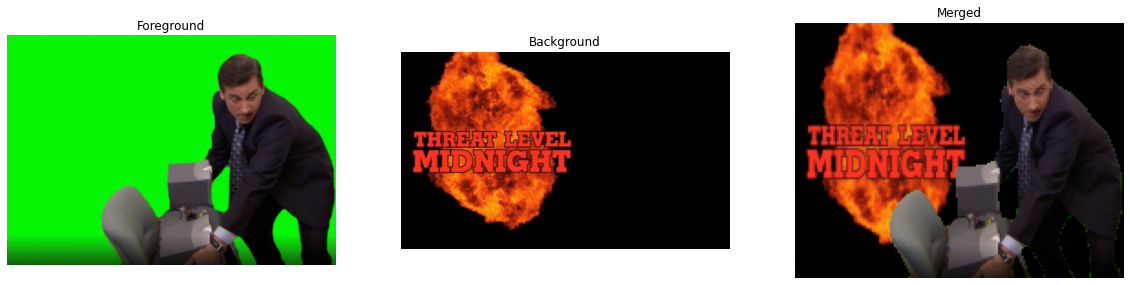

In [ ]:
# Extracts the foreground object and places it in the background and returns the resultant image
def mergeImage(im1,im2):
  fg = cv2.resize(im1,(180,140)) 
  # bg = cv2.resize(im1,(180,140))
  d=(fg.shape[1],fg.shape[0])
  bg = cv2.resize(im2, d, interpolation = cv2.INTER_AREA) 
  
  # Every green pixel in fg is replaced with that of bg
  # Iterate over every pixel in the range
  for i in range(d[1]):
    for j in range(d[0]):
      if(fg[i][j][0] in range(0, 95) and fg[i][j][1] in range(95, 255) and fg[i][j][2] in range(0, 85)):
        fg[i][j][0]=bg[i][j][0]
        fg[i][j][1]=bg[i][j][1]
        fg[i][j][2]=bg[i][j][2]

  return fg

fg = cv2.imread("/content/drive/My Drive/images/foreground.png") 
bg = cv2.imread("/content/drive/My Drive/images/background.png") 
fg = cv2.cvtColor(fg, cv2.COLOR_BGR2RGB)
bg = cv2.cvtColor(bg, cv2.COLOR_BGR2RGB)

# mostFrequently(fg)
# mostFrequently(bg)

#Plotting
plt.figure(figsize = [20,20])
plt.subplot(131)
plt.title('Foreground')
plt.imshow(fg)
plt.axis('off')

plt.subplot(132)
plt.title('Background')
plt.imshow(bg)
plt.axis('off')

plt.subplot(133)
plt.title('Merged')
plt.imshow(mergeImage(fg,bg))
plt.axis('off')
plt.show()